                   Станція 1               Станція 2  Власна реалізація  'haversine'     'geopy'  Відхилення (м)  Відхилення (%)
Пара                                                                                                                            
1            Бурштинська ТЕС       Добротвірська ТЕС          91.869977    91.870104   91.909370       39.392954        0.042861
2            Бурштинська ТЕС         Криворізька ТЕС         655.622184   655.623090  657.501795     1879.610889        0.285872
3            Бурштинська ТЕС         Курахівська ТЕС         939.713095   939.714393  942.483554     2770.458830        0.293953
4            Бурштинська ТЕС         Ладижинська ТЕС         344.704724   344.705200  345.717399     1012.675316        0.292920
5            Бурштинська ТЕС      Придніпровська ТЕС         763.105299   763.106353  765.385830     2280.531567        0.297958
6            Бурштинська ТЕС  Південноукраїнська АЕС         508.691666   508.692369  510.081522 

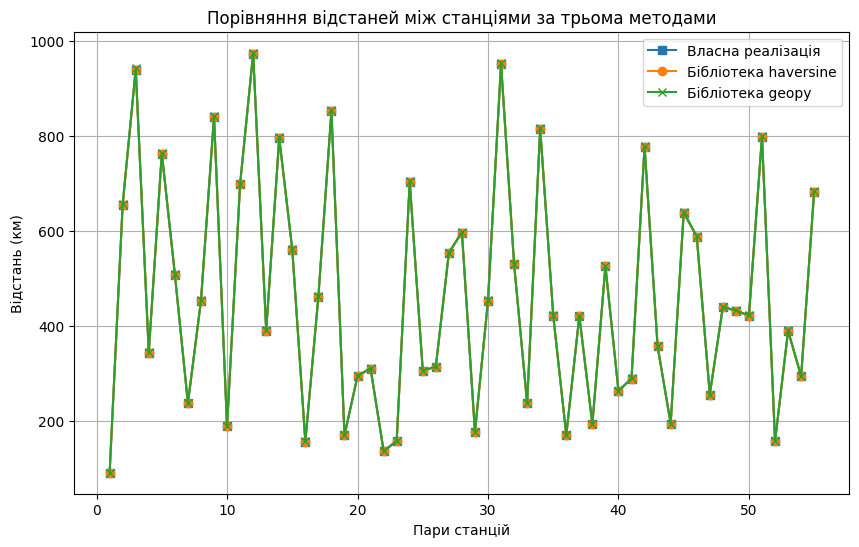

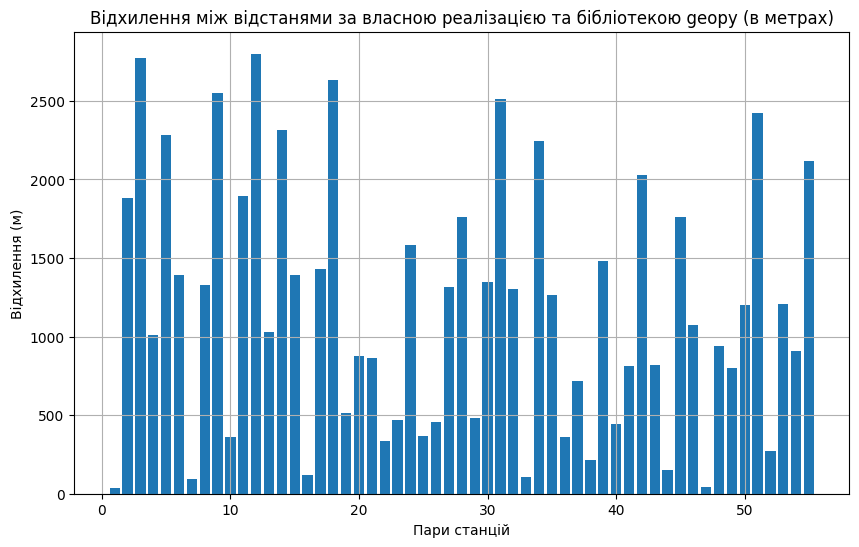

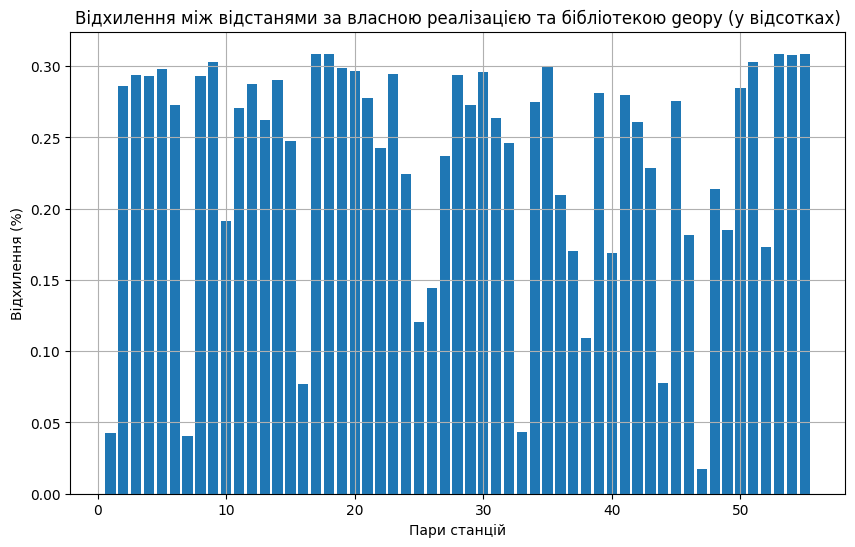

In [2]:
from math import atan2, cos, radians, sin, sqrt

import matplotlib.pyplot as plt
import pandas as pd
from geopy.distance import geodesic
from haversine import haversine as haversine_lib


# Функція для обчислення відстані між двома точками за географічними координатами
def haversine_own(lat1, lon1, lat2, lon2):
    R = 6371.0  # Радіус Землі в кілометрах
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = (
        sin(dlat / 2) ** 2
        + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon / 2) ** 2
    )
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance


# Дані про станції
stations = {
    "Бурштинська ТЕС": (49.2066, 24.6255, 2300),
    "Добротвірська ТЕС": (50.0046, 24.2952, 700),
    "Криворізька ТЕС": (47.9142, 33.3233, 2820),
    "Курахівська ТЕС": (47.9780, 37.2827, 1500),
    "Ладижинська ТЕС": (48.6536, 29.2692, 1800),
    "Придніпровська ТЕС": (48.4472, 34.9943, 1765),
    "Південноукраїнська АЕС": (47.8148, 31.2065, 3000),
    "Рівненська АЕС": (51.3272, 25.0928, 2835),
    "Трипільська ТЕС": (50.1023, 30.7673, 1800),
    "Харківська ТЕЦ-5": (50.0056, 36.2292, 540),
    "Хмельницька АЕС": (50.3016, 26.6419, 2000),
}

# Всі можливі ребра (використовується для тестування)
edges = [
    ("Бурштинська ТЕС", "Добротвірська ТЕС"),
    ("Бурштинська ТЕС", "Криворізька ТЕС"),
    ("Бурштинська ТЕС", "Курахівська ТЕС"),
    ("Бурштинська ТЕС", "Ладижинська ТЕС"),
    ("Бурштинська ТЕС", "Придніпровська ТЕС"),
    ("Бурштинська ТЕС", "Південноукраїнська АЕС"),
    ("Бурштинська ТЕС", "Рівненська АЕС"),
    ("Бурштинська ТЕС", "Трипільська ТЕС"),
    ("Бурштинська ТЕС", "Харківська ТЕЦ-5"),
    ("Бурштинська ТЕС", "Хмельницька АЕС"),
    ("Добротвірська ТЕС", "Криворізька ТЕС"),
    ("Добротвірська ТЕС", "Курахівська ТЕС"),
    ("Добротвірська ТЕС", "Ладижинська ТЕС"),
    ("Добротвірська ТЕС", "Придніпровська ТЕС"),
    ("Добротвірська ТЕС", "Південноукраїнська АЕС"),
    ("Добротвірська ТЕС", "Рівненська АЕС"),
    ("Добротвірська ТЕС", "Трипільська ТЕС"),
    ("Добротвірська ТЕС", "Харківська ТЕЦ-5"),
    ("Добротвірська ТЕС", "Хмельницька АЕС"),
    ("Криворізька ТЕС", "Курахівська ТЕС"),
    ("Криворізька ТЕС", "Ладижинська ТЕС"),
    ("Криворізька ТЕС", "Придніпровська ТЕС"),
    ("Криворізька ТЕС", "Південноукраїнська АЕС"),
    ("Криворізька ТЕС", "Рівненська АЕС"),
    ("Криворізька ТЕС", "Трипільська ТЕС"),
    ("Криворізька ТЕС", "Харківська ТЕЦ-5"),
    ("Криворізька ТЕС", "Хмельницька АЕС"),
    ("Курахівська ТЕС", "Ладижинська ТЕС"),
    ("Курахівська ТЕС", "Придніпровська ТЕС"),
    ("Курахівська ТЕС", "Південноукраїнська АЕС"),
    ("Курахівська ТЕС", "Рівненська АЕС"),
    ("Курахівська ТЕС", "Трипільська ТЕС"),
    ("Курахівська ТЕС", "Харківська ТЕЦ-5"),
    ("Курахівська ТЕС", "Хмельницька АЕС"),
    ("Ладижинська ТЕС", "Придніпровська ТЕС"),
    ("Ладижинська ТЕС", "Південноукраїнська АЕС"),
    ("Ладижинська ТЕС", "Рівненська АЕС"),
    ("Ладижинська ТЕС", "Трипільська ТЕС"),
    ("Ладижинська ТЕС", "Харківська ТЕЦ-5"),
    ("Ладижинська ТЕС", "Хмельницька АЕС"),
    ("Придніпровська ТЕС", "Південноукраїнська АЕС"),
    ("Придніпровська ТЕС", "Рівненська АЕС"),
    ("Придніпровська ТЕС", "Трипільська ТЕС"),
    ("Придніпровська ТЕС", "Харківська ТЕЦ-5"),
    ("Придніпровська ТЕС", "Хмельницька АЕС"),
    ("Південноукраїнська АЕС", "Рівненська АЕС"),
    ("Південноукраїнська АЕС", "Трипільська ТЕС"),
    ("Південноукраїнська АЕС", "Харківська ТЕЦ-5"),
    ("Південноукраїнська АЕС", "Хмельницька АЕС"),
    ("Рівненська АЕС", "Трипільська ТЕС"),
    ("Рівненська АЕС", "Харківська ТЕЦ-5"),
    ("Рівненська АЕС", "Хмельницька АЕС"),
    ("Трипільська ТЕС", "Харківська ТЕЦ-5"),
    ("Трипільська ТЕС", "Хмельницька АЕС"),
    ("Харківська ТЕЦ-5", "Хмельницька АЕС"),
]

# Обчислення відстаней між станціями за трьома методами
results = []

for edge in edges:
    station1, station2 = edge
    lat1, lon1, _ = stations[station1]
    lat2, lon2, _ = stations[station2]
    distance_own = haversine_own(lat1, lon1, lat2, lon2)
    distance_lib = haversine_lib((lat1, lon1), (lat2, lon2))
    distance_geopy = geodesic((lat1, lon1), (lat2, lon2)).km
    results.append((station1, station2, distance_own, distance_lib, distance_geopy))

# Створення DataFrame для зручності аналізу
df = pd.DataFrame(
    results,
    columns=["Станція 1", "Станція 2", "Власна реалізація", "'haversine'", "'geopy'"],
)

# Додавання нумерації пар станцій
df.index = df.index + 1
df.index.name = "Пара"

# Обчислення відхилень у метрах та відсотках
df["Відхилення (м)"] = abs(df["Власна реалізація"] - df["'geopy'"]) * 1000
df["Відхилення (%)"] = (df["Відхилення (м)"] / (df["'geopy'"] * 1000)) * 100
max_deviation = df["Відхилення (м)"].max()
max_deviation_pair = df.loc[df["Відхилення (м)"].idxmax(), ["Станція 1", "Станція 2"]]

# Виведення результатів у таблиці
pd.set_option("display.max_rows", None)  # Виведення всіх рядків
print(df.to_string())
print(
    f"\nНайбільше відхилення: {max_deviation:.2f} метрів між станціями {max_deviation_pair['Станція 1']} і {max_deviation_pair['Станція 2']}"
)

# Побудова графіку для порівняння
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Власна реалізація"], label="Власна реалізація", marker="s")
plt.plot(df.index, df["'haversine'"], label="Бібліотека haversine", marker="o")
plt.plot(df.index, df["'geopy'"], label="Бібліотека geopy", marker="x")
plt.xlabel("Пари станцій")
plt.ylabel("Відстань (км)")
plt.title("Порівняння відстаней між станціями за трьома методами")
plt.legend()
plt.grid()
plt.show()

# Побудова графіку для відхилень у метрах
plt.figure(figsize=(10, 6))
plt.bar(df.index, df["Відхилення (м)"])
plt.xlabel("Пари станцій")
plt.ylabel("Відхилення (м)")
plt.title(
    "Відхилення між відстанями за власною реалізацією та бібліотекою geopy (в метрах)"
)
plt.grid()
plt.show()

# Побудова графіку для відхилень у відсотках
plt.figure(figsize=(10, 6))
plt.bar(df.index, df["Відхилення (%)"])
plt.xlabel("Пари станцій")
plt.ylabel("Відхилення (%)")
plt.title(
    "Відхилення між відстанями за власною реалізацією та бібліотекою geopy (у відсотках)"
)
plt.grid()
plt.show()


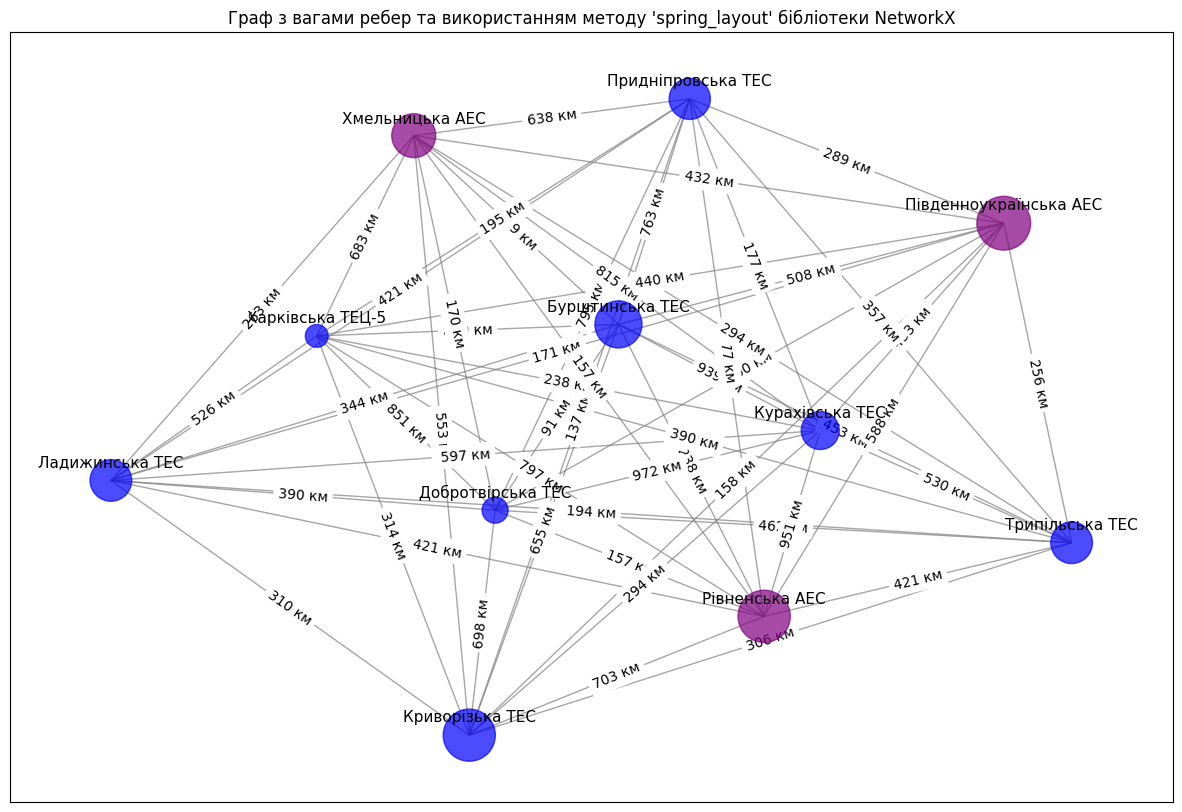

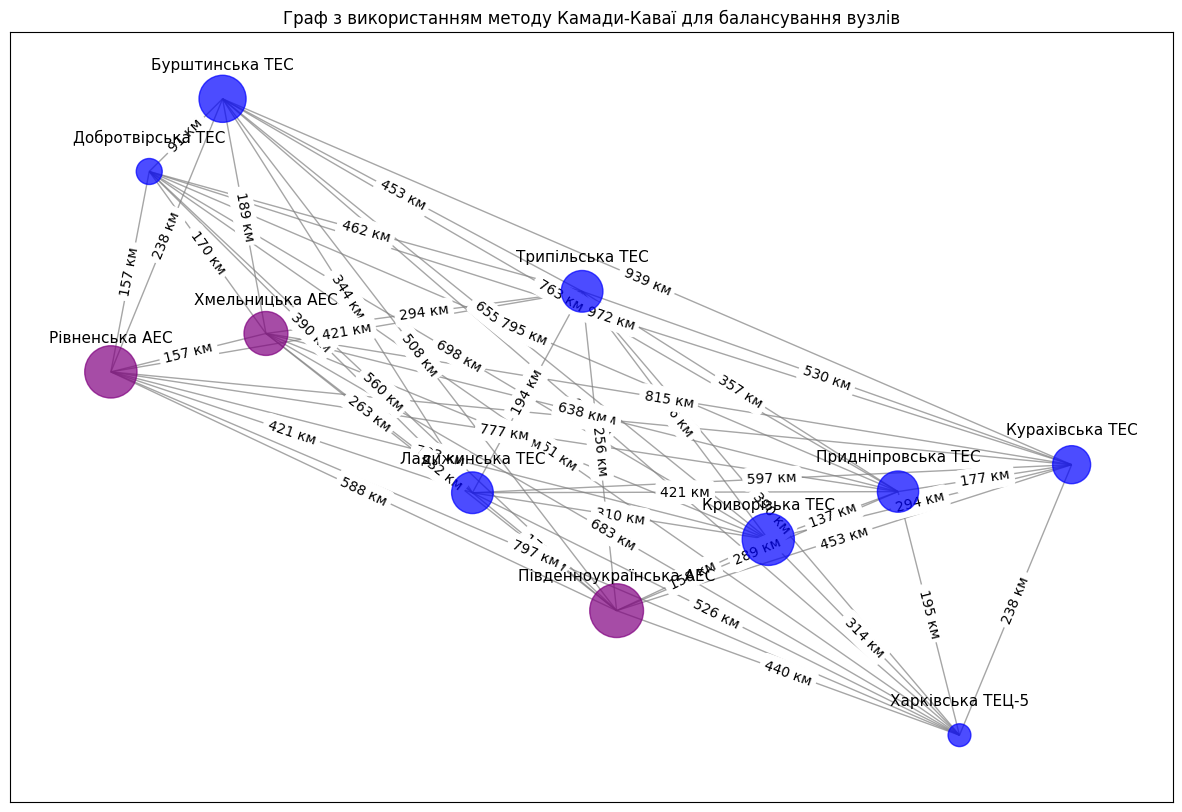

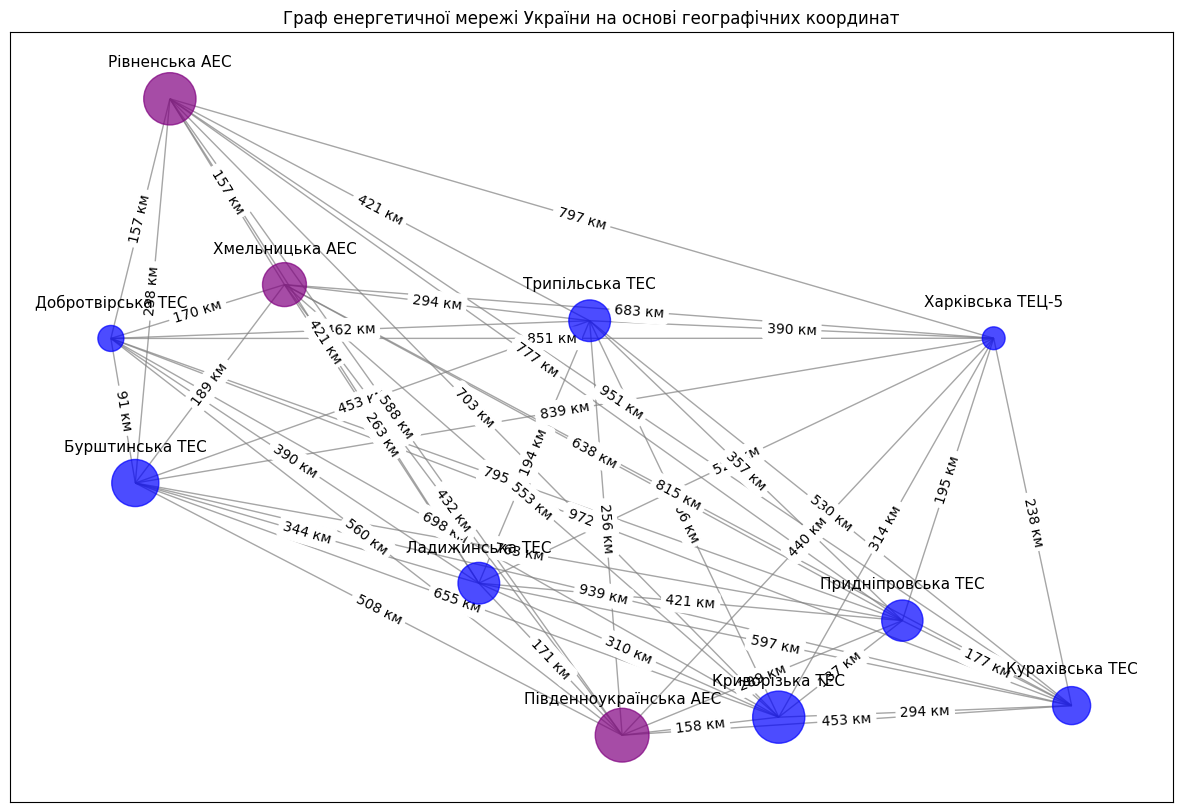

In [ ]:
# Побудова графів

# Ініціалізація графу
G = nx.Graph()

# Додавання вузлів
for station, (lat, lon, capacity) in stations.items():
    G.add_node(station, pos=(lon, lat), capacity=capacity)
# Позиції вузлів
pos = nx.get_node_attributes(G, 'pos')
# Розміри вузлів
node_sizes = [G.nodes[station]['capacity'] / 2 for station in G.nodes]
# Вибір кольорів для вузлів з урахуванням атомних електростанцій
node_colors = ['purple' if "АЕС" in station else 'blue' for station in G.nodes]
# Підписи станцій з відступами зверху
name_labels = {station: station for station in G.nodes}
name_label_pos = {station: (coords[0], coords[1] + 0.2) for station, coords in pos.items()}

# Додавання до ребер ваги, що дорівнює відстані між вузлами
for edge in edges:
    station1, station2 = edge
    lat1, lon1, _ = stations[station1]
    lat2, lon2, _ = stations[station2]
    distance = haversine_own(lat1, lon1, lat2, lon2)
    G.add_edge(station1, station2, weight=distance)
# Додавання до ребер підписів, що відображають їх вагу (відстань між станціями)
edge_labels = nx.get_edge_attributes(G, 'weight')


# 1. Побудова графу з використанням функції spring_layout з бібліотеки NetworkX ("стандартний" метод)
pos_weighted = nx.spring_layout(G, weight="weight")
# Побудова графу
plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos_weighted, edge_color='grey', alpha=0.7)
nx.draw_networkx_nodes(G, pos_weighted, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, {station: (coords[0], coords[1] + 0.05) for station, coords in pos_weighted.items()}, name_labels, font_size=11)
nx.draw_networkx_edge_labels(G, pos_weighted, edge_labels={(u, v): f"{int(d['weight'])} км" for u, v, d in G.edges(data=True)})
plt.title("Граф з вагами ребер та використанням методу 'spring_layout' бібліотеки NetworkX")
plt.show()


# 2. Побудова графу з використанням функції kamada_kawai_layout з бібліотеки NetworkX
pos_weighted = nx.kamada_kawai_layout(G, weight='weight')
# Інвертуємо порядок вузлів для зворотнього відображення,
# у даному випадку це допоможе зобразити вузли ближче до їх географічного розташування
pos_weighted_reversed = {node: (-coords[0], -coords[1]) for node, coords in pos_weighted.items()}
# Побудова графу
plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos_weighted_reversed, edge_color='grey', alpha=0.7)
nx.draw_networkx_nodes(G, pos_weighted_reversed, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, {station: (coords[0], coords[1] + 0.05) for station, coords in pos_weighted_reversed.items()}, name_labels, font_size=11)
nx.draw_networkx_edge_labels(G, pos_weighted_reversed, edge_labels={(u, v): f"{int(d['weight'])} км" for u, v, d in G.edges(data=True)})
plt.title("Граф з використанням методу Камади-Каваї для балансування вузлів")
plt.show()


# 3. Побудова графу на основі фактичних географічних координат
plt.figure(figsize=(15, 10))
nx.draw_networkx_edges(G, pos, edge_color='grey', alpha=0.7)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_labels(G, {station: (coords[0], coords[1] + 0.2) for station, coords in pos.items()}, name_labels, font_size=11)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{int(d['weight'])} км" for u, v, d in G.edges(data=True)})
plt.title("Граф енергетичної мережі України на основі географічних координат")
plt.show()
